## Predicting Customer Churn
Customer churn is a key metric which are used by services based providers to predict which customers are not likely to continue with their service. In this excercise, we will acquire a public dataset provided by a Cell Phone Service Provider. This dataset contains the target variable "Churn" with binary values "Y" or "N" indicating if a customer is churn. <br>
###Reference and modifications
This excercise is based on the example of AWS sagemaker - Customer churn. We will use the dataset and data cleansing methods from that workbook. The change we are going to incorporate is that we will leverage XGBoost implementation.




### Loading python libraries
Here we will load, pandas, numpy, XGboost(Python libararies) and other plotting libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import graphviz


### Loading the dataset. 
For this excercise, i have to downloaded data locally to my PC, and loaded into pandas dataframe.
But its publicly available here http://dataminingconsultant.com/DKD2e_data_sets.zip

In [3]:
churn = pd.read_csv('./churn.txt')

### Reviewing the data set
1.   Checking the features and datatypes
2.   Creating two dataframes for Numerical & Categorical Features.
1.   Performing Dependency Analysis of features with targer variable







In [4]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [5]:
churn_categorical = churn.select_dtypes(include=['object'])

In [6]:
churn_numeric = churn.select_dtypes(exclude=['object'])

## Feature Engineering

We are going drop to feature (Phone) as this has no dependecy on target variable. <br>
From the dataset feature Area code is integer datatype, but wil be converted as object.


In [7]:
churn = churn.drop('Phone', axis=1)

In [8]:
churn['Area Code'] = churn['Area Code'].astype(object)

### Feature Correlattion
1.   For Categorical data types, we will chart observations.
2.   For Numerical data types, we will plot histograms



Churn?,False.,True.
State,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


Churn?,False.,True.
Area Code,,
408,0.251228,0.252588
415,0.497895,0.488613
510,0.250877,0.258799


Churn?,False.,True.
Int'l Plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


Churn?,False.,True.
VMail Plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


Account Length


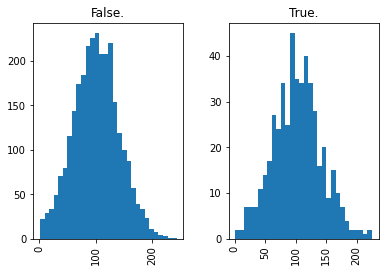

VMail Message


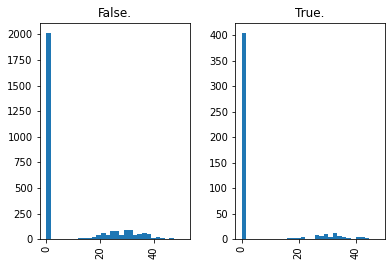

Day Mins


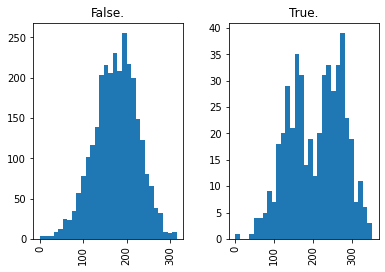

Day Calls


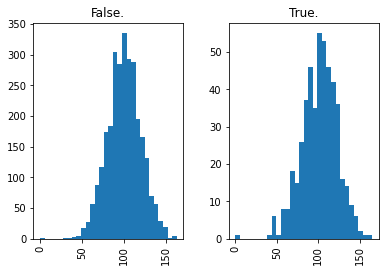

Day Charge


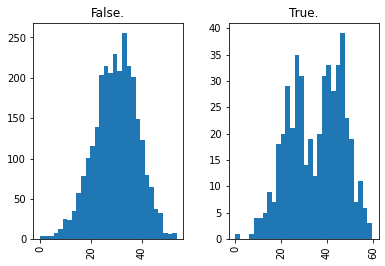

Eve Mins


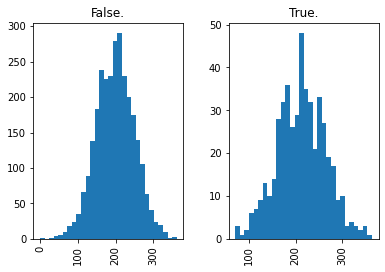

Eve Calls


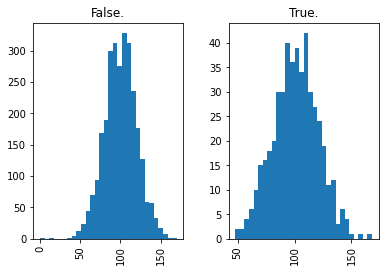

Eve Charge


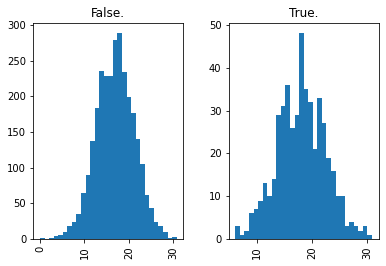

Night Mins


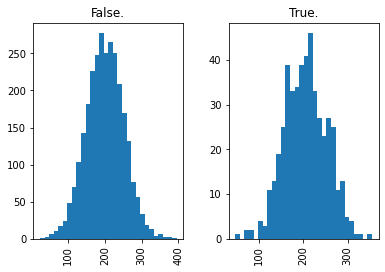

Night Calls


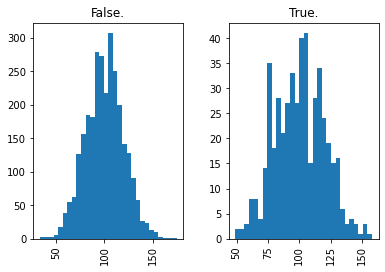

Night Charge


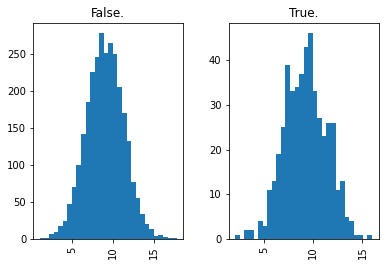

Intl Mins


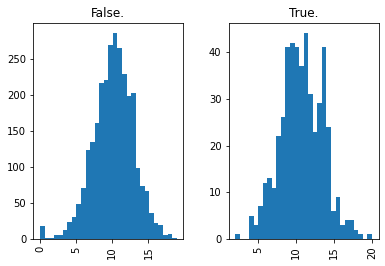

Intl Calls


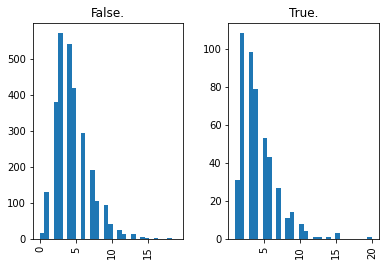

Intl Charge


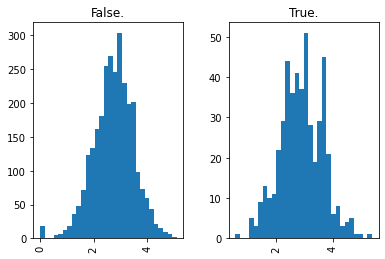

CustServ Calls


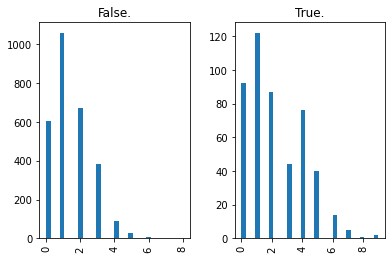

In [9]:
for column in churn.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
        display(pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns'))

        
for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

### Feature Engineering
Based on the histograms, we conclude that features Day Charge, Eve Charge, Night Charge, Intl Charge have no impact on predicting Churn rate

In [10]:
churn = churn.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1)

### One-hot encoding
Converting categorical values into numerical values

In [16]:
model_data = pd.get_dummies(churn)

In [17]:
model_data = pd.concat([model_data['Churn?_True.'], model_data.drop(['Churn?_False.', 'Churn?_True.'],axis=1)], axis=1)

### Splitting dataset to Train, Validation & Test data

1.  Numpy libraries split the original dataset into three categories(Train, Validation, and Test).
2.  We have to convert numpy arrays into CSV format.





In [18]:
train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])

In [19]:
train_data.to_csv('train.csv')

In [20]:
train_df = pd.read_csv('./train.csv')

In [21]:
validation_data.to_csv('validation.csv')

In [22]:
validation_df = pd.read_csv('./validation.csv')

In [23]:
test_data.to_csv('test.csv')

In [24]:
test_df = pd.read_csv('./test.csv')

## XGBOOST Parameters

There are three types of parameters for XGBoost we have to set before training

*   General Parameters: This relates to which booster we are using.
*  Booster Parameters: These are the parameters which vary based on the booster you chose.
*   Learning Task Parameters: These are the parameters needed for learning. These vary based on the learning mechanism, Classification, Regression or Ranking.
*   Command Line Parameters: These are the parameters which are used to control the IO of the model resources.

1.   num_round = The number of rounds for boosting
2.   Max_depth= Max depth of tree. Higher value of this parameter will make the model more complex.
1.   ETA= Step size shrinkage. This is used to prevent overfitting. After every boosting step, we can directly get the weights of new features and eta shrinks the feature weights to make the boosting process more conservative
2.   Objective: This is the learning objective. This parameter varies based on the learning task(Classification, Regression, Ranking)
5.   Eval_metric: Evaluation metrics for validation.







Define parameters

In [25]:
num_round = 10

In [26]:
param = {'max_depth':3, 'eta': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}

### Converting Pandas dataframe to Xgboost DMatrix
Here we are converting csv data into XGBoost DBMatrix, and identifying the target variable column. 

In [27]:
dtrain = xgb.DMatrix('train.csv?format=csv&label_column=1')

[17:17:14] 2334x70 matrix with 163380 entries loaded from train.csv?format=csv&label_column=1


In [28]:
dvalid = xgb.DMatrix('validation.csv?format=csv&label_column=1')

[17:17:20] 667x70 matrix with 46690 entries loaded from validation.csv?format=csv&label_column=1


In [29]:
dtest = dtest = xgb.DMatrix('test.csv?format=csv&label_column=1')

[17:17:25] 335x70 matrix with 23450 entries loaded from test.csv?format=csv&label_column=1


In [30]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

### XGBoost Training

The train method is used to train, and based on the num_round parmeters, we will get our eval_metric AUC for both Train and validation datasets. As you can see the AUC for training is 96% and for Validation dataset is 86%

In [31]:
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.791782	train-auc:0.848785
[1]	eval-auc:0.855386	train-auc:0.909337
[2]	eval-auc:0.870793	train-auc:0.926645
[3]	eval-auc:0.874115	train-auc:0.936856
[4]	eval-auc:0.882716	train-auc:0.951634
[5]	eval-auc:0.87857	train-auc:0.955284
[6]	eval-auc:0.885923	train-auc:0.957537
[7]	eval-auc:0.885025	train-auc:0.959766
[8]	eval-auc:0.872327	train-auc:0.967652
[9]	eval-auc:0.86451	train-auc:0.967714


### Save Model and dump the model

In [32]:
bst.save_model('0001.model')

In [36]:
bst.dump_model('dump.raw.txt')

### XGBoost Predictions

In [38]:
ypred = bst.predict(dtest)

In [39]:
print(ypred)

[0.03017637 0.00979576 0.00385541 0.00691016 0.29032022 0.00691016
 0.011225   0.45164788 0.00979576 0.06096351 0.00446468 0.04834396
 0.01994255 0.00385541 0.04882845 0.0158836  0.00580743 0.0952007
 0.02609231 0.36871427 0.04877605 0.02311784 0.61140335 0.01977573
 0.0158836  0.011225   0.01101333 0.00691016 0.99941766 0.0158836
 0.02262757 0.01399165 0.01035381 0.01059169 0.00385541 0.01165892
 0.5947194  0.0158836  0.0051297  0.03510007 0.04470418 0.01530986
 0.10870663 0.01059169 0.00716025 0.00979576 0.9179888  0.01056115
 0.02262757 0.07894392 0.01365522 0.0290805  0.0158836  0.0245402
 0.02262757 0.4159592  0.00651868 0.00627485 0.22809084 0.08696859
 0.05679083 0.12132574 0.00758099 0.07055785 0.02672626 0.02311784
 0.05532948 0.01230951 0.00385541 0.01078372 0.00781594 0.00979576
 0.19783723 0.0234918  0.01011122 0.0952007  0.8426346  0.46594793
 0.03087211 0.00781594 0.011225   0.04550414 0.01056115 0.01317891
 0.011225   0.06705781 0.90246516 0.04806277 0.00385541 0.0188826

### XGBoost Plotting Importance
Here we are going to plot the importance of top 10 features.

<function matplotlib.pyplot.show>

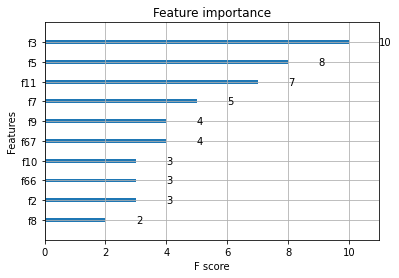

In [45]:
xgb.plot_importance(bst, max_num_features=10)
plt.rcParams['figure.figsize'] = [5,5]
plt.show

### XGBoost Plotting Graphs

Lets plot the tree here

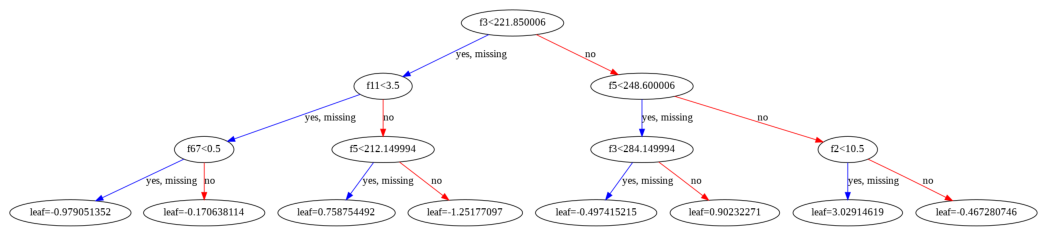

In [44]:
xgb.plot_tree(bst,num_trees=1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)